In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import json
%matplotlib inline
import scipy

In [ ]:
# form a global BBV out of all the cores

def form_dataframe(dirpath:Path):
    index = 0
    df = pd.DataFrame()
    path = Path(dirpath / f"lpinfo{index}.json")
    while path.is_file():
        global_bbv = {}
        bbinst = {}
        global_inst = 0
        with open(path.as_posix()) as file:
            data = json.load(file)
            bbinst = data["global BBinst profile"]
            global_inst = data["global inst"]
            for key, value in data.items():
                if "core" in key:
                    for pc, freq in value["BBfreq"].items():
                        if pc in global_bbv:
                            global_bbv[pc] += freq
                        else:
                            global_bbv[pc] = freq
        weighted_global_bbv = {}
        for key, value in global_bbv.items():
            inst = bbinst[key]
            weighted_global_bbv[key] = ((float(value) * float(inst)))/float(global_inst)
        df = df.append(weighted_global_bbv,ignore_index=True)
        index += 1
        if path == Path(dirpath / "lpinfoend.json"):
            break
        else:
            path = Path(dirpath / f"lpinfo{index}.json")
        if not path.is_file():
            path = Path(dirpath / "lpinfoend.json")
    df = df.replace(np.nan,0)
    return df

df = form_dataframe(Path("/home/studyztp/test_ground/looppoint_analysis/data/lpinfo-dump"))



In [24]:
df.to_csv("bbvinfo.csv")
df

,4247821,4257524,4257033,4257501,4256927,4256713,4275472,4256664,4256502,4256477,...,4200171,4200179,4200418,4200435,4200447,4296208,4296219,4296272,4296448,4296464
0,2.099999e-07,0.000036,0.010033,0.000717,0.013186,0.000041,0.001319,0.000050,0.001128,0.001411,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.320000e-07,0.000025,0.006919,0.000494,0.009094,0.000028,0.001934,0.000035,0.000778,0.000973,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001934,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001502,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,2.699998e-07,0.000047,0.013027,0.000931,0.017122,0.000053,0.001714,0.000065,0.001466,0.001832,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,5.999999e-08,0.000011,0.003018,0.000215,0.003965,0.000012,0.001282,0.000015,0.000340,0.000425,...,3.999999e-09,2.000000e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
756,2.819994e-07,0.000051,0.013934,0.000995,0.018315,0.000057,0.001934,0.000069,0.001567,0.001959,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
757,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001934,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
758,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001931,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [25]:
nparr = df.to_numpy()
nparr

array([[2.09999903e-07, 3.63999832e-05, 1.00325354e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31999972e-07, 2.51039946e-05, 6.91949852e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.30463275e-08, 2.30463275e-08, 3.84105458e-08]])

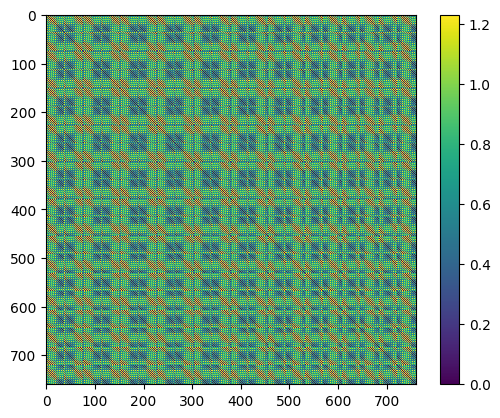

In [26]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(nparr, metric='cityblock')
dist_matrix = squareform(distances)
plt.imshow(dist_matrix, interpolation='none')
plt.colorbar()
plt.show()

In [27]:
distances.shape

(288420,)

In [28]:
def manhattan_dist(arr1, arr2):
    sum = 0
    for iter1, iter2 in zip(arr1,arr2):
        sum += abs(iter1 - iter2)
    return sum

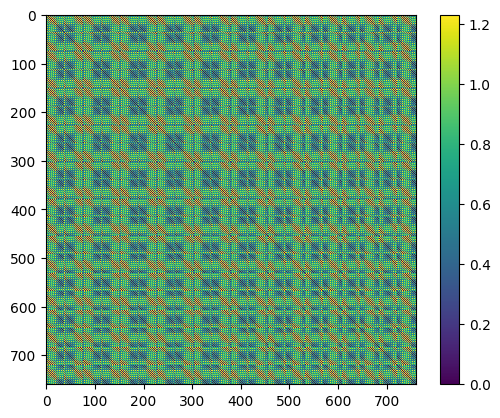

In [29]:
mandis = []
for row1 in nparr:
    rowdis = []
    for row2 in nparr:
        rowdis.append(manhattan_dist(row1,row2))
    mandis.append(rowdis)
npmandist=np.array(mandis)
plt.imshow(npmandist, interpolation='none')
plt.colorbar()
plt.show()

In [30]:
print(dist_matrix)

[[0.         0.81447652 1.20693761 ... 1.20694047 1.20693842 1.20694174]
 [0.81447652 0.         0.39386161 ... 0.39324114 0.75601838 0.86624531]
 [1.20693761 0.39386161 0.         ... 0.3171664  0.43885935 0.54908775]
 ...
 [1.20694047 0.39324114 0.3171664  ... 0.         0.75602575 0.86625268]
 [1.20693842 0.75601838 0.43885935 ... 0.75602575 0.         0.11022887]
 [1.20694174 0.86624531 0.54908775 ... 0.86625268 0.11022887 0.        ]]


In [31]:
print(npmandist)

[[0.         0.81447652 1.20693761 ... 1.20694047 1.20693842 1.20694174]
 [0.81447652 0.         0.39386161 ... 0.39324114 0.75601838 0.86624531]
 [1.20693761 0.39386161 0.         ... 0.3171664  0.43885935 0.54908775]
 ...
 [1.20694047 0.39324114 0.3171664  ... 0.         0.75602575 0.86625268]
 [1.20693842 0.75601838 0.43885935 ... 0.75602575 0.         0.11022887]
 [1.20694174 0.86624531 0.54908775 ... 0.86625268 0.11022887 0.        ]]


In [32]:
npmandist.shape

(760, 760)